In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_metrics(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**(1/2)
    r2 = r2_score(y_test, y_pred)
    print(model)
    print('R2 of Training:', r2)
    print('MSE:', mse)
    print('RMSE:', rmse)
    
def split_and_get_metrics(dataframe):
    df_train, df_test = train_test_split(df, test_size=0.2)
    X_train = df_train.loc[:, ~(df_train.columns).isin(['FollowingYearWeapons'])]
    Y_train = df_train['FollowingYearWeapons']
    X_test = df_test.loc[:, ~(df_test.columns).isin(['FollowingYearWeapons'])]
    Y_test = df_test['FollowingYearWeapons']
    get_metrics(linear, X_train, Y_train, X_test, Y_test)
    get_metrics(ridge, X_train, Y_train, X_test, Y_test)
    get_metrics(lasso, X_train, Y_train, X_test, Y_test)
    get_metrics(gbr, X_train, Y_train, X_test, Y_test)
    get_metrics(rfr, X_train, Y_train, X_test, Y_test)
    
def quick_plots(column):
    norm = np.random.normal(0, 1, len(df))
    norm.sort()
    weap_incidents_sorted = column.sort_values()
    plt.figure(figsize = (20,5))
    plt.subplot(1,2,1)
    plt.plot(norm, column.sort_values(), "o")
    plt.title('QQ Plot')
    
    plt.subplot(1,2,2)
    plt.scatter(x=column, y=df['FollowingYearWeapons'])
    plt.title('Scatter Plot')
    plt.ylabel('Following Year Weapons')
    plt.xlabel('Column Name')
    plt.show()
    
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
knn = KNeighborsRegressor()

In [15]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/data_capstone_set.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1.1', 'Unnamed: 0.1'], axis =1)
df.shape

(22277, 147)

In [16]:
(df.max().sort_values(ascending=False))[0:10]

Total OSS Expulsions    122727.0
Total OSS               122550.0
Conduct OSS              57777.0
Academic OSS             38481.0
Violence OSS             25122.0
Enrollment                9877.0
Incidents                 2344.0
Year                      2013.0
Offenders                 1474.0
Disorderly Conduct        1002.0
dtype: float64

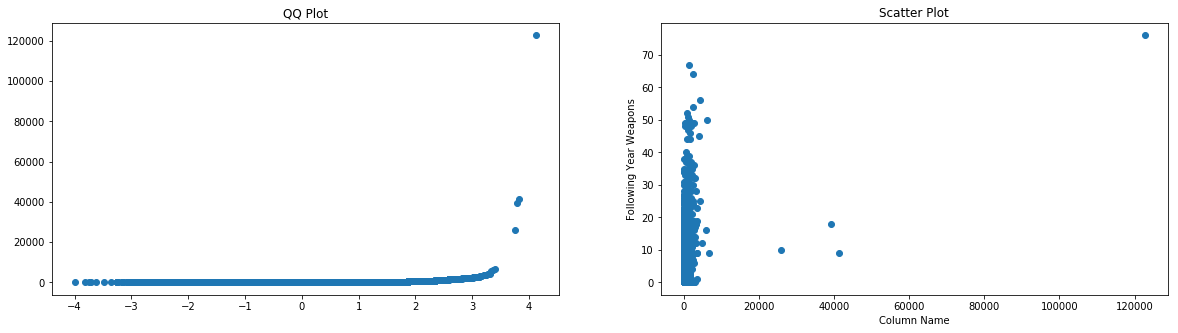

In [17]:
quick_plots(df['Total OSS Expulsions'])

In [18]:
np.corrcoef(df['Total OSS Expulsions'], df['FollowingYearWeapons'])

array([[ 1.       ,  0.2445275],
       [ 0.2445275,  1.       ]])

In [19]:
df = df[df['Total OSS Expulsions'] < 5000]
np.corrcoef(df['Total OSS Expulsions'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.51777416],
       [ 0.51777416,  1.        ]])

In [27]:
df2 = df[df['Total OSS Expulsions'] < 3000]

In [28]:
np.corrcoef(df2['Total OSS Expulsions'], df2['FollowingYearWeapons'])

array([[ 1.        ,  0.51859722],
       [ 0.51859722,  1.        ]])

In [20]:
split_and_get_metrics(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.508834676281
MSE: 7.0556370073
RMSE: 2.65624490725
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 of Training: 0.50862550101
MSE: 7.05864183016
RMSE: 2.65681046184
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.488425967998
MSE: 7.34881006021
RMSE: 2.71086887551
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=No

In [6]:
df.shape

(22270, 147)

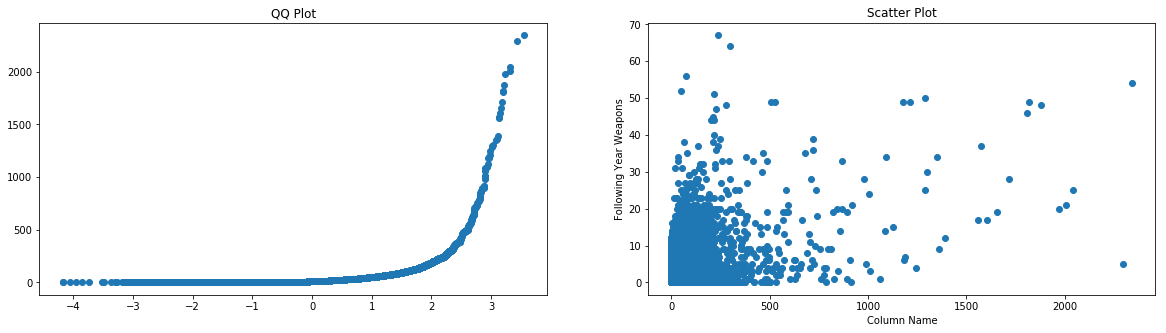

In [7]:
quick_plots(df['Incidents'])

In [8]:
df2 = df[df['Incidents'] > 2000]
df2[['Incidents', 'FollowingYearWeapons']]

,Incidents,FollowingYearWeapons
8125,2344,54.0
10698,2043,25.0
13852,2009,21.0
14575,2294,5.0


In [9]:
df = df[df['Incidents'] != 2294]

In [10]:
split_and_get_metrics(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.50776780345
MSE: 6.77887349319
RMSE: 2.60362698811
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 of Training: 0.507496999819
MSE: 6.78260291921
RMSE: 2.60434308785
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.48449848077
MSE: 7.09933159371
RMSE: 2.66445709174
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=No

In [29]:
(df.max().sort_values(ascending=False))[0:10]

Enrollment              9877.0
Total OSS Expulsions    4760.0
Total OSS               4755.0
Conduct OSS             3854.0
Incidents               2344.0
Year                    2013.0
Offenders               1474.0
Academic OSS            1390.0
Violence OSS            1291.0
Disorderly Conduct      1002.0
dtype: float64

In [13]:
np.corrcoef(df['Incidents'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.47170034],
       [ 0.47170034,  1.        ]])

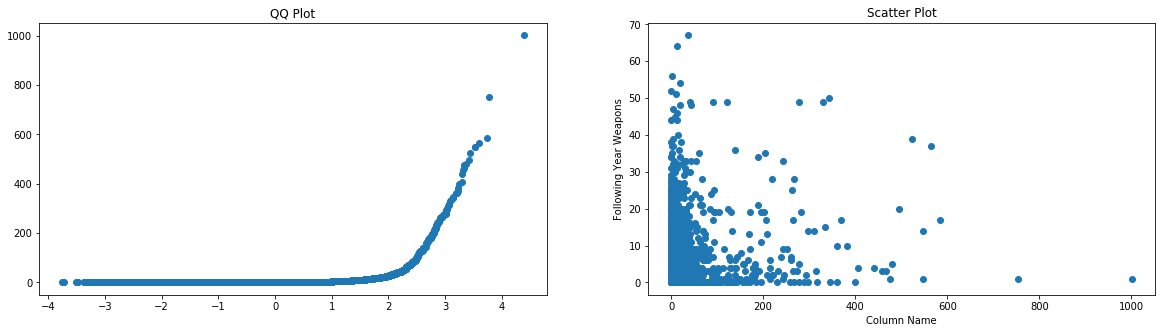

In [31]:
quick_plots(df['Disorderly Conduct'])

In [32]:
np.corrcoef(df['Disorderly Conduct'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.20444284],
       [ 0.20444284,  1.        ]])

In [33]:
df = df[df['Disorderly Conduct'] < 800]
np.corrcoef(df['Disorderly Conduct'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.21494833],
       [ 0.21494833,  1.        ]])

In [34]:
df = df[df['Disorderly Conduct'] < 720]
np.corrcoef(df['Disorderly Conduct'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.22169727],
       [ 0.22169727,  1.        ]])

In [35]:
(df.max().sort_values(ascending=False))[0:10]

Enrollment              9877.0
Total OSS Expulsions    4760.0
Total OSS               4755.0
Conduct OSS             3854.0
Incidents               2344.0
Year                    2013.0
Offenders               1474.0
Academic OSS            1390.0
Violence OSS            1291.0
Total Expulsion          632.0
dtype: float64

In [36]:
np.corrcoef(df['Offenders'], df['FollowingYearWeapons'])

array([[ 1.        ,  0.57390446],
       [ 0.57390446,  1.        ]])

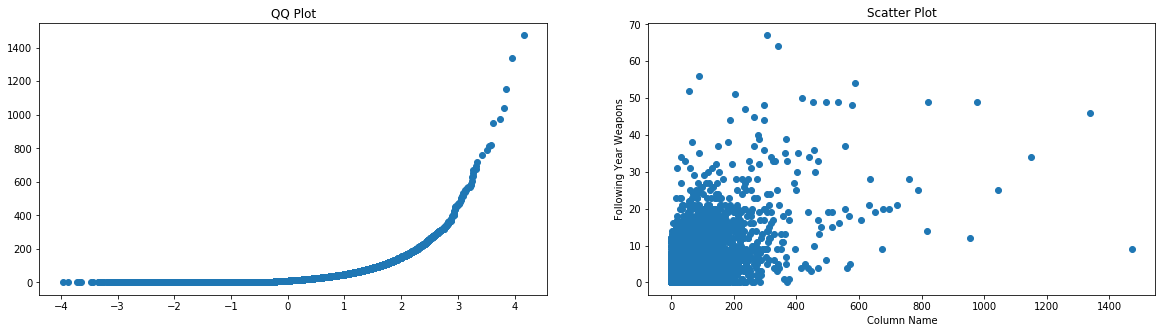

In [38]:
quick_plots(df['Offenders'])

In [39]:
df2 = df[df['Offenders'] < 1420]

In [40]:
np.corrcoef(df2['Offenders'], df2['FollowingYearWeapons'])

array([[ 1.       ,  0.5824668],
       [ 0.5824668,  1.       ]])

In [41]:
df = df[df['Offenders'] < 1420]

In [43]:
split_and_get_metrics(df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
R2 of Training: 0.522125317878
MSE: 8.38756375056
RMSE: 2.8961290977
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2 of Training: 0.521761618037
MSE: 8.39394733963
RMSE: 2.89723097796
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2 of Training: 0.496830769522
MSE: 8.83152875814
RMSE: 2.97178881453
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=N